In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
job = pd.read_csv('ai_job.csv').dropna(how='all')
job.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
job.shape

(15000, 19)

In [7]:
job.duplicated().sum()

0

In [9]:
job.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [11]:
job.set_index('job_id',inplace=True)
job.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [13]:
job.drop('job_description_length', axis=1,inplace=True)
job.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,6.6,Advanced Robotics


In [19]:
job['posting_date'] = pd.to_datetime(job['posting_date'])
job['application_deadline'] = pd.to_datetime(job['application_deadline'])
job.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,6.6,Advanced Robotics


In [50]:
job['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

C:\Users\syafr\AppData\Local\Temp\ipykernel_11240\62479022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=job, x='experience_level', y='salary_usd', palette='pastel')


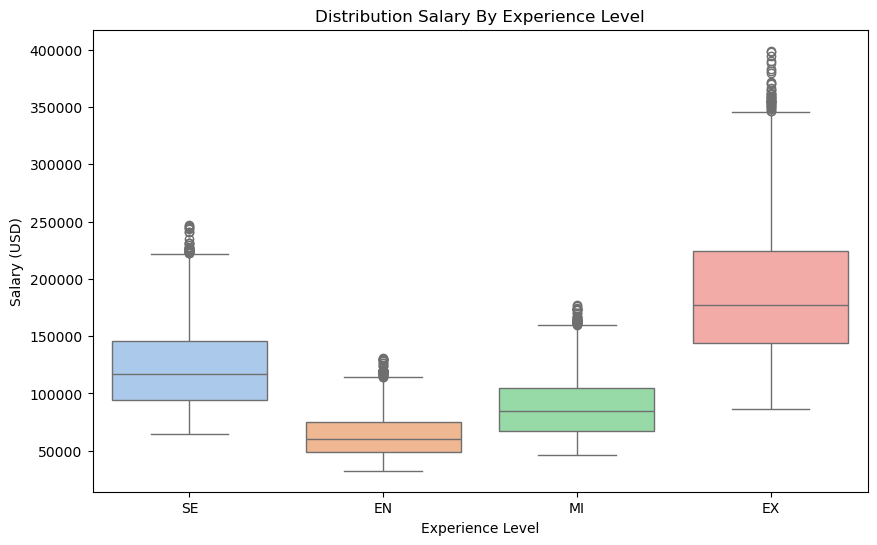

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=job, x='experience_level', y='salary_usd', palette='pastel')
plt.title('Distribution Salary By Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

C:\Users\syafr\AppData\Local\Temp\ipykernel_11240\1992841273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_job_salaries, x='job_title', y='salary_usd', estimator='mean', palette='pastel')


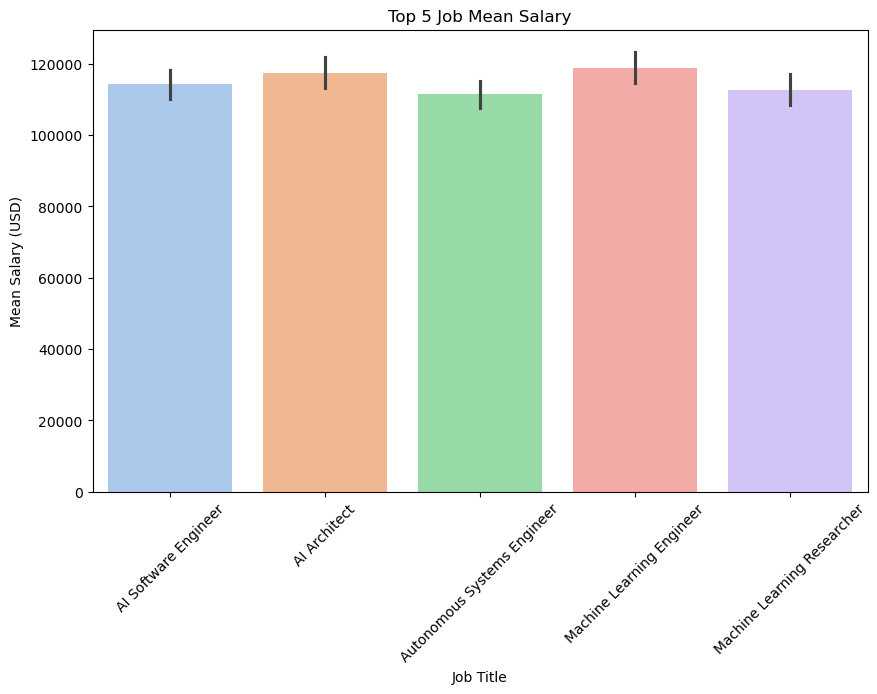

In [70]:
top_jobs = job['job_title'].value_counts().nlargest(5).index
top_job_salaries = job[job['job_title'].isin(top_jobs)]
plt.figure(figsize=(10,6))
sns.barplot(data=top_job_salaries, x='job_title', y='salary_usd', estimator='mean', palette='pastel')
plt.title('Top 5 Job Mean Salary')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.xticks(rotation=45)
plt.show()


C:\Users\syafr\AppData\Local\Temp\ipykernel_11240\642439068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_title',data=top_10,palette='pastel',order=top_10job)


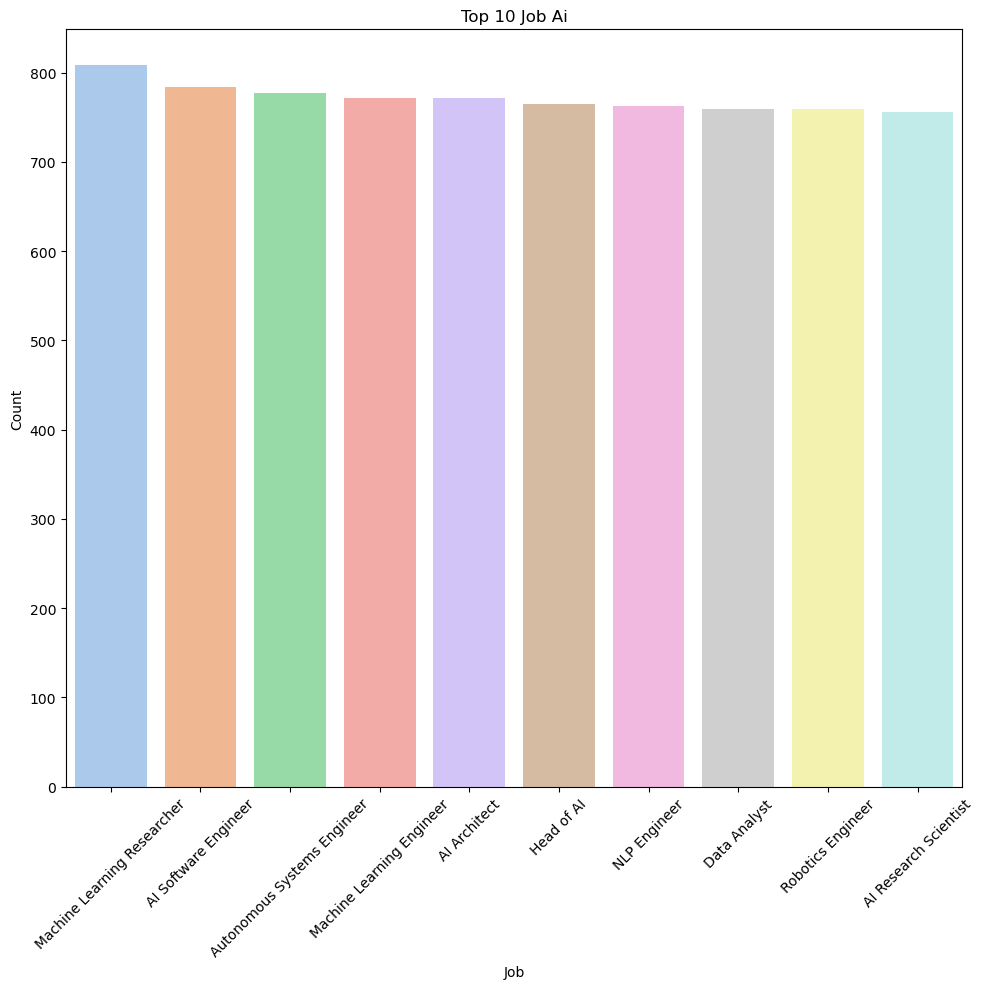

In [34]:
top_10job = job.value_counts('job_title').head(10).index
top_10 = job[job['job_title'].isin(top_10job)]
plt.figure(figsize=(10,10))
plt.title('Top 10 Job Ai')
sns.countplot(x='job_title',data=top_10,palette='pastel',order=top_10job)
plt.ylabel('Count')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

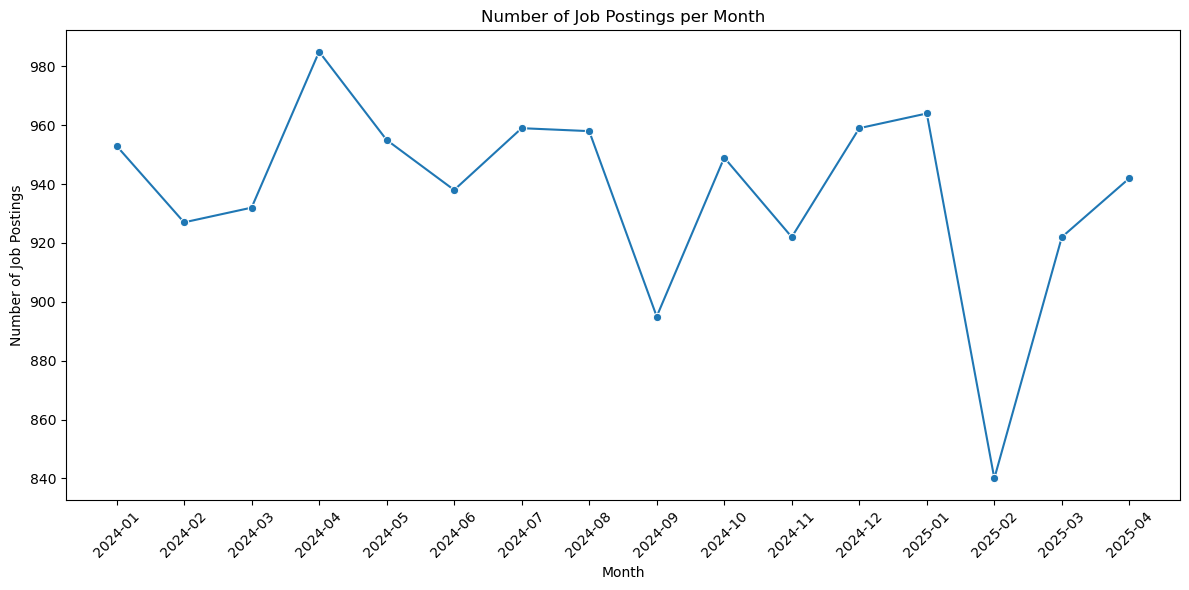

In [68]:
job['posting_month'] = job['posting_date'].dt.to_period('M').astype(str)
monthly_postings = job.groupby('posting_month').size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_postings, x='posting_month', y='count', marker='o')
plt.title('Number of Job Postings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

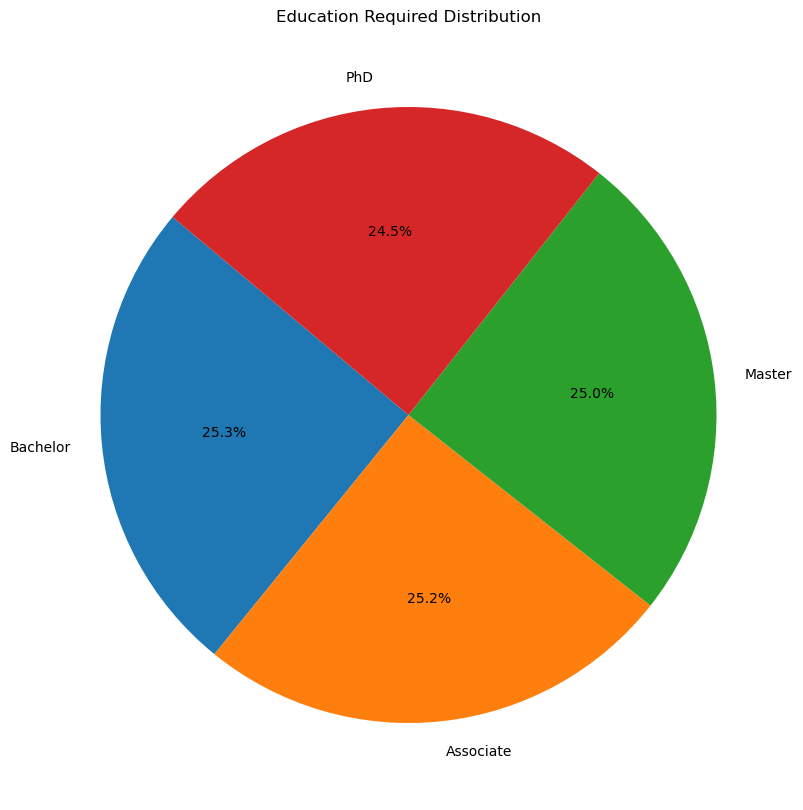

In [44]:
education_need = job.value_counts('education_required')
plt.figure(figsize=(10,10))
plt.title('Education Required Distribution')
plt.pie(education_need,autopct='%1.1f%%',startangle=140,labels=education_need.index)
plt.ylabel('')
plt.show()